## Funções a serem estudadas:

\begin{equation*}
   f(x_1, x_2) = x_1^2 - 3x_1x_2 + 4x_2^2 + x_1 - x_2 \;\; com \;\; \\
   \overrightarrow{P_1} = 
   \begin{Bmatrix}
    1 \\ 2
   \end{Bmatrix} \;\; e \;\; \overrightarrow{d} =
   \begin{Bmatrix}
   -1 \\ -2
   \end{Bmatrix}
\end{equation*}

\begin{equation*}
   mcCormick(x_1, x_2) = \sin{(x_1 + x_2)} + (x_1 - x_2)^2 - 1.5x_1 + 2.5x_2 \;\; com \;\; \\
   \overrightarrow{P_1} = 
   \begin{Bmatrix}
    -2 \\ \phantom{-}3
   \end{Bmatrix} \;\; e \;\; \overrightarrow{d} =
   \begin{Bmatrix}
   \phantom{-}1.453 \\ -4.547
   \end{Bmatrix}
\end{equation*}

\begin{equation*}
   himmelblau(x_1, x_2) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2 \;\; com \;\; \\
   \overrightarrow{P_1} = 
   \begin{Bmatrix}
    0 \\ 5
   \end{Bmatrix} \;\; e \;\; \overrightarrow{d} =
   \begin{Bmatrix}
   3 \\ 1.5
   \end{Bmatrix}
\end{equation*}

In [447]:
import numpy as np
import matplotlib.pyplot as plt
import linear_search_methods as lsm

def f(P):
    return P[0]**2 - 3*P[0]*P[1] + 4*(P[1]**2) + P[0] - P[1]

def mcCormick(P):
    return np.sin(P[0] + P[1]) + (P[0] - P[1])**2 - 1.5*P[0] + 2.5*P[1]

def himmelblau(P):
    return (P[0]**2 + P[1] - 11)**2 + (P[0] + P[1]**2 - 7)**2



## Busca Unidimensional usando os seguintes métodos:

-  ### Passo constante com step de 0.01
-  ### Bisseção com tolerância de 1E-5
-  ### Seção Áurea com tolerância de 1E-5


## Q2 a) 
### Parte 1 - Cálculo dos pontos mínimos usando os 3 métodos propostos em $f(x_1, x_2)$

In [448]:
#inputs de Ponto inicial e direção de busca
P1 = np.array([1, 2])
dir = np.array([-1, -2])

#chama o metodo do passo constante
q2_a_pss_ct = lsm.passo_cte(dir, P1, f)

#funcao lsm.passo_cte entrega o intervalo de busca na segunda posição do array de retorno
intervalo = q2_a_pss_ct[1]

#chama o o metodo da bissecao
q2_a_bssc = lsm.bissecao(intervalo.copy(), dir, P1, f)

#chama o metodo da seção áurea
q2_a_sc_ar = lsm.secao_aurea(intervalo.copy(), dir, P1, f)

print(f'Passo constante : \u03B1 min = {intervalo[0]:.10f} e P min = ({q2_a_pss_ct[0][0]:.10f}, {q2_a_pss_ct[0][1]:.10f}) ')
print(f'Bisseção        : \u03B1 min = {q2_a_bssc[1]:.10f} e P min = ({q2_a_bssc[0][0]:.10f}, {q2_a_bssc[0][1]:.10f}) ')
print(f'Passo constante : \u03B1 min = {q2_a_sc_ar[1]:.10f} e P min = ({q2_a_sc_ar[0][0]:.10f}, {q2_a_sc_ar[0][1]:.10f}) ')


Passo constante : α min = 2.1300000000 e P min = (0.0474350416, 0.0948700832) 
Bisseção        : α min = 2.1344287109 e P min = (0.0454544618, 0.0909089237) 
Passo constante : α min = 2.1344280564 e P min = (0.0454547546, 0.0909095092) 


## Q2 a) 
### Parte 2 - Plot das curvas de níveis e reta entre os pontos inicial e final da busca na função $f(x_1, x_2)$

-  #### Como os 3 métodos resultam em $P_{min}$ relativamente próximos, os plots de cada método são muito parecidos
-  #### Para efeitos práticos estarei plotando apenas o gráfico para o método da seção áurea

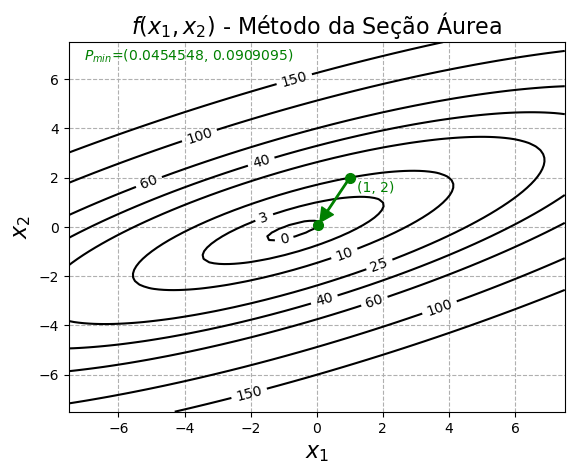

In [449]:
#Escolhido o Pmin gerado pelo metodo da seção aurea para representar graficamente
Pmin = q2_a_sc_ar[0]

x1 = np.linspace(-7.5, 7.5, 100)
x2 = np.linspace(-7.5, 7.5, 100)
X1, X2 = np.meshgrid(x1, x2)
x3 = f([X1, X2])
niveis = plt.contour(X1, X2, x3, [0, 3, 10, 25, 40, 60, 100, 150], colors='black')
plt.clabel(niveis, inline=1, fontsize=10)
plt.annotate('', xy=Pmin, xytext=P1,
                arrowprops=dict(width=1, color='green', headwidth=10, headlength=10, shrink=0.05), fontsize='10')
plt.annotate(f'({P1[0]}, {P1[1]})', xy=P1, xytext=(5,-10), textcoords='offset points', color='green')
plt.annotate(f'$P_{{min}}$=({round(Pmin[0], 7)}, {round(Pmin[1], 7)})', xy=Pmin, xytext=(0.03,0.95), textcoords='axes fraction', color='green')
plt.plot(P1[0], P1[1], marker="o", markersize=7, markeredgecolor="green", markerfacecolor="green")
plt.plot(Pmin[0], Pmin[1], marker="o", markersize=7, markeredgecolor="green", markerfacecolor="green")
plt.xlabel('$x_1$', fontsize='16')
plt.ylabel('$x_2$', fontsize='16')
plt.grid(linestyle='--')
plt.title("$f(x_1, x_2)$ - Método da Seção Áurea", fontsize='16')
plt.savefig("A_solution.pdf", format="pdf")
plt.show()

## Q2 b) 
### Parte 1 - Cálculo dos pontos mínimos usando os 3 métodos propostos em $mcCormick(x_1, x_2)$

In [450]:
#inputs de Ponto inicial e direção de busca
P1 = np.array([-2, 3])
dir= np.array([1.453, -4.547])

#chama o metodo do passo constante
q2_b_pss_ct = lsm.passo_cte(dir, P1, mcCormick)

#funcao lsm.passo_cte entrega o intervalo de busca na segunda posição do array de retorno
intervalo = q2_b_pss_ct[1]

#chama o o metodo da bissecao
q2_b_bssc = lsm.bissecao(intervalo.copy(), dir, P1, mcCormick)

#chama o metodo da seção áurea
q2_b_sc_ar = lsm.secao_aurea(intervalo.copy(), dir, P1, mcCormick)

print(f'Passo constante : \u03B1 min = {intervalo[0]:.10f} e P min = ({q2_b_pss_ct[0][0]:.10f}, {q2_b_pss_ct[0][1]:.10f}) ')
print(f'Bisseção        : \u03B1 min = {q2_a_bssc[1]:.10f} e P min = ({q2_b_bssc[0][0]:.10f}, {q2_b_bssc[0][1]:.10f}) ')
print(f'Passo constante : \u03B1 min = {q2_a_sc_ar[1]:.10f} e P min = ({q2_b_sc_ar[0][0]:.10f}, {q2_b_sc_ar[0][1]:.10f}) ')


Passo constante : α min = 4.7700000000 e P min = (-0.5480690486, -1.5436545327) 
Bisseção        : α min = 2.1344287109 e P min = (-0.5469796129, -1.5470637991) 
Passo constante : α min = 2.1344280564 e P min = (-0.5469803722, -1.5470614229) 


## Q2 b) 
### Parte 2 - Plot das curvas de níveis e reta entre os pontos inicial e final da busca na função $mcCormick(x_1, x_2)$

-  #### Como os 3 métodos resultam em $P_{min}$ relativamente próximos, os plots de cada método são muito parecidos
-  #### Para efeitos práticos estarei plotando apenas o gráfico para o método do passo constante

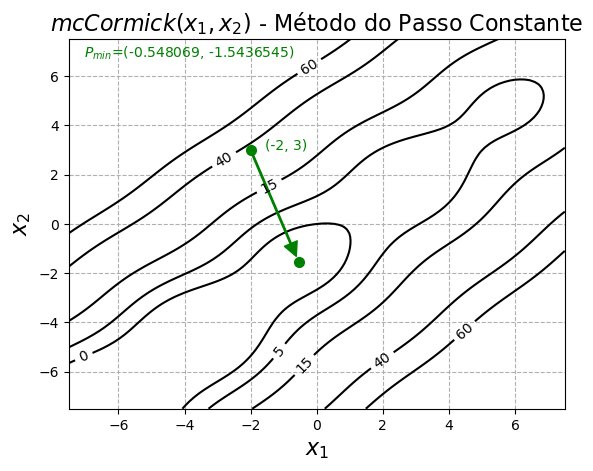

In [451]:
#Escolhido o Pmin gerado pelo metodo do passo constante para representar graficamente
Pmin = q2_b_pss_ct[0]

#x1 = np.linspace(-2.5, 2.5, 100)
#x2 = np.linspace(-4, 4, 100)
x1 = np.linspace(-7.5, 7.5, 100)
x2 = np.linspace(-7.5, 7.5, 100)
X1, X2 = np.meshgrid(x1, x2)
x3 = mcCormick([X1, X2])
niveis = plt.contour(X1, X2, x3, [0, 5, 15, 40, 60], colors='black')
plt.clabel(niveis, inline=1, fontsize=10)
plt.annotate('', xy=Pmin, xytext=P1,
                arrowprops=dict(width=1, color='green', headwidth=10, headlength=10, shrink=0.05), fontsize='10')
plt.annotate(f'({P1[0]}, {P1[1]})', xy=P1, xytext=(10,0), textcoords='offset points', color='green')
plt.annotate(f'$P_{{min}}$=({round(Pmin[0], 7)}, {round(Pmin[1], 7)})', xy=Pmin, xytext=(0.03, 0.95), textcoords='axes fraction', color='green')
plt.plot(P1[0], P1[1], marker="o", markersize=7, markeredgecolor="green", markerfacecolor="green")
plt.plot(Pmin[0], Pmin[1], marker="o", markersize=7, markeredgecolor="green", markerfacecolor="green")
plt.xlabel('$x_1$', fontsize='16')
plt.ylabel('$x_2$', fontsize='16')
plt.grid(linestyle='--')
plt.title("$mcCormick(x_1, x_2)$ - Método do Passo Constante", fontsize='16')
plt.savefig("B_solution.pdf", format="pdf")
plt.show()

## Q2 c) 
### Parte 1 - Cálculo dos pontos mínimos usando os 3 métodos propostos em $himmelblau(x_1, x_2)$

In [452]:
#inputs de Ponto inicial e direção de busca
P1 = np.array([0, 5])
dir = np.array([3, 1.5])

#chama o metodo do passo constante
q2_c_pss_ct = lsm.passo_cte(dir, P1, himmelblau)

#funcao lsm.passo_cte entrega o intervalo de busca na segunda posição do array de retorno
intervalo = q2_c_pss_ct[1]

#chama o o metodo da bissecao
q2_c_bssc = lsm.bissecao(intervalo.copy(), dir, P1, himmelblau)

#chama o metodo da seção áurea
q2_c_sc_ar = lsm.secao_aurea(intervalo.copy(), dir, P1, himmelblau)

print(f'Passo constante : \u03B1 min = {intervalo[0]:.10f} e P min = ({q2_c_pss_ct[0][0]:.10f}, {q2_c_pss_ct[0][1]:.10f}) ')
print(f'Bisseção        : \u03B1 min = {q2_c_bssc[1]:.10f} e P min = ({q2_c_bssc[0][0]:.10f}, {q2_c_bssc[0][1]:.10f}) ')
print(f'Passo constante : \u03B1 min = {q2_c_sc_ar[1]:.10f} e P min = ({q2_c_sc_ar[0][0]:.10f}, {q2_c_sc_ar[0][1]:.10f}) ')


Passo constante : α min = 0.0000000000 e P min = (0.0000000000, 5.0000000000) 
Bisseção        : α min = 0.0000048828 e P min = (0.0000043673, 5.0000021837) 
Passo constante : α min = 0.0000036657 e P min = (0.0000032787, 5.0000016393) 


## Q2 c) 
### Parte 2 - Plot das curvas de níveis e reta entre os pontos inicial e final da busca na função $himmelblau(x_1, x_2)$

-  #### Como os 3 métodos resultam em $P_{min}$ relativamente próximos, os plots de cada método são muito parecidos
-  #### Para efeitos práticos estarei plotando apenas o gráfico para o método da bisseção

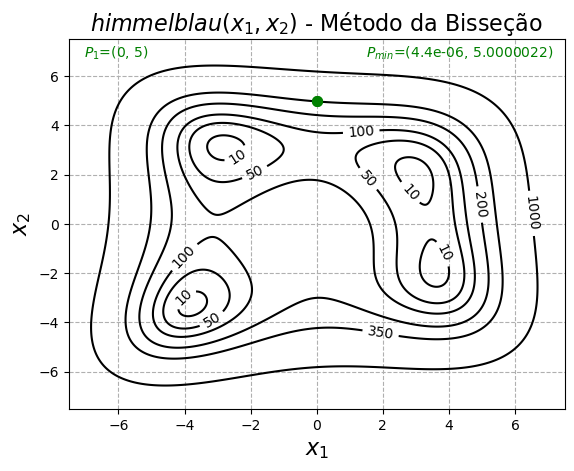

In [453]:
#Escolhido o Pmin gerado pelo metodo da bisseção para representar graficamente
Pmin = q2_c_bssc[0]

x1 = np.linspace(-7.5, 7.5, 1000)
x2 = np.linspace(-7.5, 7.5, 1000)
X1, X2 = np.meshgrid(x1, x2)
x3 = himmelblau([X1, X2])
niveis = plt.contour(X1, X2, x3, [10,50,100,200, 350, 1000], colors='black')
plt.clabel(niveis, inline=1, fontsize=10)
#plt.annotate('', xy=Pmin, xytext=P1,
#                arrowprops=dict(width=1, color='green', headwidth=10, headlength=10, shrink=0.05), fontsize='10')
plt.annotate(f'$P_1$=({P1[0]}, {P1[1]})', xy=P1, xytext=(0.03,0.95), textcoords='axes fraction', color='green')
plt.annotate(f'$P_{{min}}$=({round(Pmin[0], 7)}, {round(Pmin[1], 7)})', xy=Pmin, xytext=(0.6,0.95), textcoords='axes fraction', color='green')
plt.plot(P1[0], P1[1], marker="o", markersize=7, markeredgecolor="green", markerfacecolor="green")
plt.plot(Pmin[0], Pmin[1], marker="o", markersize=7, markeredgecolor="green", markerfacecolor="green")
plt.xlabel('$x_1$', fontsize='16')
plt.ylabel('$x_2$', fontsize='16')
plt.grid(linestyle='--')
plt.title("$himmelblau(x_1, x_2)$ - Método da Bisseção", fontsize='16')
plt.savefig("C_solution.pdf", format="pdf")
plt.show()

## Q2 c) 
### Parte 2 Continuação - Plot das curvas de níveis e reta entre os pontos inicial e final da busca na função $himmelblau(x_1, x_2)$

-  #### O Gráfico obtido para a função de $himmelblau(x_1, x_2)$ mostrou que o ponto inicial seria o mínimo para o sentido de busca informado
-  #### No gráfico abaixo faço um plot com o ponto inicial e o vetor direção de busca para avaliar o seu sentido
-  #### O correto parece ser inverter o sentido da busca

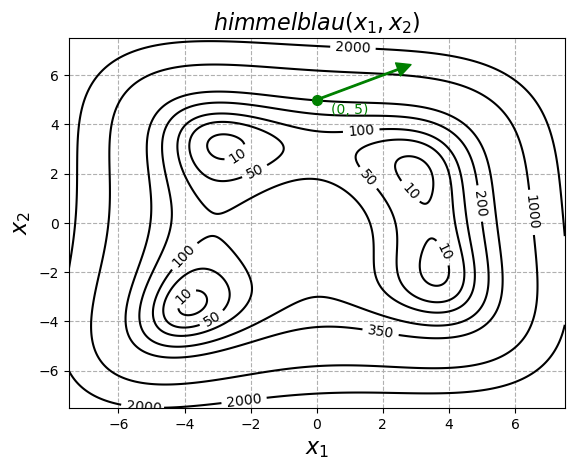

In [454]:
#visualização da funcão de maneira mais global
#claramente o sentido de busca informado está equivocado, fazendo com que a procura seja feito na direção de crescimento da função 
x1 = np.linspace(-7.5, 7.5, 1000)
x2 = np.linspace(-7.5, 7.5, 1000)
X1, X2 = np.meshgrid(x1, x2)
P = P1 + dir
x3 = himmelblau([X1, X2])
niveis = plt.contour(X1, X2, x3, [10,50,100,200, 350, 1000, 2000], colors='black')
plt.clabel(niveis, inline=1, fontsize=10)
plt.annotate('', xy=P, xytext=P1,
                arrowprops=dict(width=1, color='green', headwidth=10, headlength=10, shrink=0.05), fontsize='10')
plt.annotate(f'({P1[0]}, {P1[1]})', xy=P1, xytext=(10,-10), textcoords='offset points', color='green')
plt.plot(P1[0], P1[1], marker="o", markersize=7, markeredgecolor="green", markerfacecolor="green")
plt.xlabel('$x_1$', fontsize='16')
plt.ylabel('$x_2$', fontsize='16')
plt.grid(linestyle='--')
plt.title("$himmelblau(x_1, x_2)$", fontsize='16')
plt.savefig("C_sentido_informado.pdf", format="pdf")
plt.show()

## Q2 c) 
### Parte 3 - Cálculo dos pontos mínimos usando os 3 métodos propostos em $himmelblau(x_1, x_2)$ mas com sentido de busca oposto ao utilizado anteriormente

In [455]:
#inputs de Ponto inicial e direção de busca
P1 = np.array([0, 5])
dir = -np.array([3, 1.5])

#chama o metodo do passo constante
q2_c_pss_ct = lsm.passo_cte(dir, P1, himmelblau)

#funcao lsm.passo_cte entrega o intervalo de busca na segunda posição do array de retorno
intervalo = q2_c_pss_ct[1]

#chama o o metodo da bissecao
q2_c_bssc = lsm.bissecao(intervalo.copy(), dir, P1, himmelblau)

#chama o metodo da seção áurea
q2_c_sc_ar = lsm.secao_aurea(intervalo.copy(), dir, P1, himmelblau)

print(f'Passo constante : \u03B1 min = {intervalo[0]:.10f} e P min = ({q2_c_pss_ct[0][0]:.10f}, {q2_c_pss_ct[0][1]:.10f}) ')
print(f'Bisseção        : \u03B1 min = {q2_c_bssc[1]:.10f} e P min = ({q2_c_bssc[0][0]:.10f}, {q2_c_bssc[0][1]:.10f}) ')
print(f'Passo constante : \u03B1 min = {q2_c_sc_ar[1]:.10f} e P min = ({q2_c_sc_ar[0][0]:.10f}, {q2_c_sc_ar[0][1]:.10f}) ')

Passo constante : α min = 3.3900000000 e P min = (-3.0321081775, 3.4839459113) 
Bisseção        : α min = 3.3921630859 e P min = (-3.0340429004, 3.4829785498) 
Passo constante : α min = 3.3921633455 e P min = (-3.0340431325, 3.4829784337) 


## Q2 c) 
### Parte 3 - Plot das curvas de níveis e reta entre os pontos inicial e final da busca na função $himmelblau(x_1, x_2)$

-  #### Como os 3 métodos resultam em $P_{min}$ relativamente próximos, os plots de cada método são muito parecidos
-  #### Para efeitos práticos estarei plotando apenas o gráfico para o método da bisseção

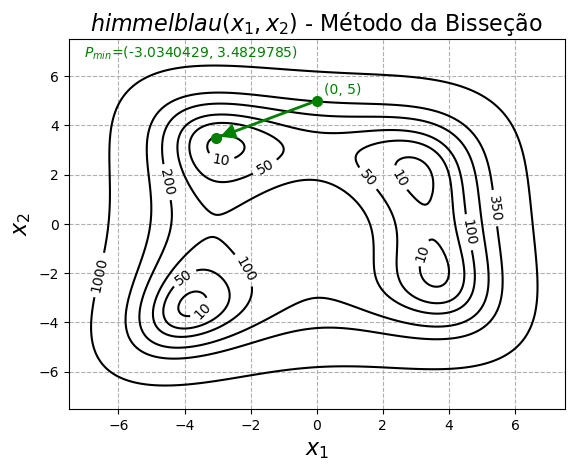

In [456]:
#Escolhido o Pmin gerado pelo metodo da bisseção para representar graficamente
Pmin = q2_c_bssc[0]

x1 = np.linspace(-7.5, 7.5, 200)
x2 = np.linspace(-7.5, 7.5, 200)
X1, X2 = np.meshgrid(x1, x2)
x3 = himmelblau([X1, X2])
niveis = plt.contour(X1, X2, x3, [10,50,100,200, 350, 1000], colors='black')
plt.clabel(niveis, inline=1, fontsize=10)
plt.annotate('', xy=Pmin, xytext=P1,
                arrowprops=dict(width=1, color='green', headwidth=10, headlength=10, shrink=0.05), fontsize='10')
plt.annotate(f'({P1[0]}, {P1[1]})', xy=P1, xytext=(5,5), textcoords='offset points', color='green')
plt.annotate(f'$P_{{min}}$=({round(Pmin[0], 7)}, {round(Pmin[1], 7)})', xy=Pmin, xytext=(0.03,0.95), textcoords='axes fraction', color='green')
plt.plot(P1[0], P1[1], marker="o", markersize=7, markeredgecolor="green", markerfacecolor="green")
plt.plot(Pmin[0], Pmin[1], marker="o", markersize=7, markeredgecolor="green", markerfacecolor="green")
plt.xlabel('$x_1$', fontsize='16')
plt.ylabel('$x_2$', fontsize='16')
plt.grid(linestyle='--')
plt.title("$himmelblau(x_1, x_2)$ - Método da Bisseção", fontsize='16')
plt.savefig("C_sentido_oposto.pdf", format="pdf")
plt.show()